# Tarea #2: Los buenos ejemplos se copian

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

## Problema 1: Behavioural finance

In [15]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.font_manager as fm
from matplotlib import lines
from flexitext import flexitext
import matplotlib.patheffects as pe

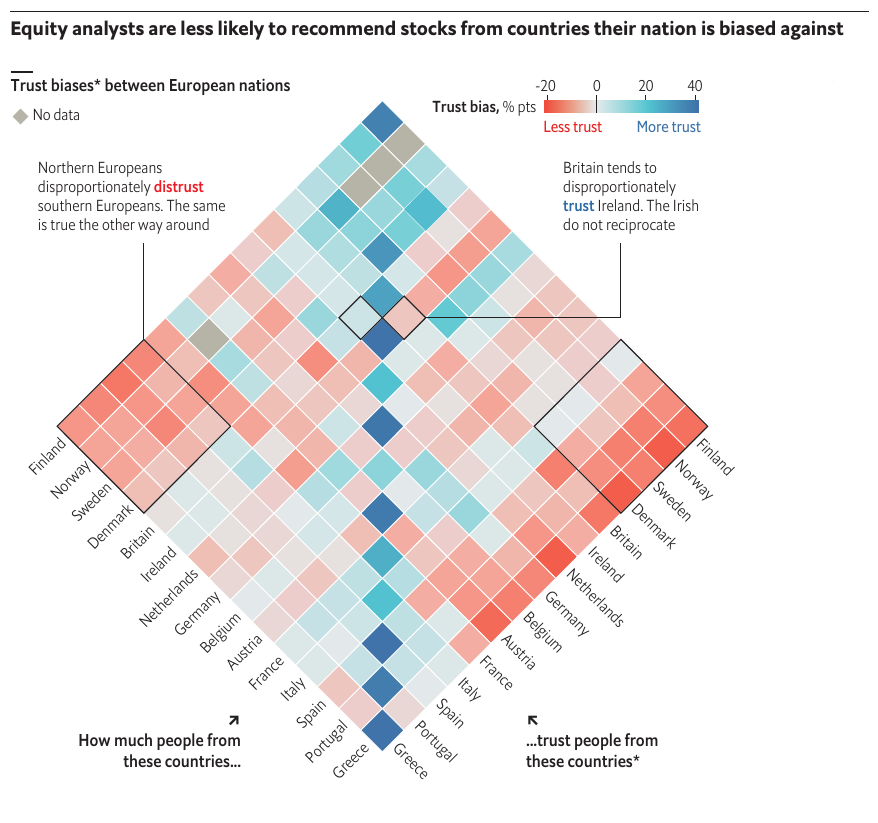

In [16]:
Image("./images/01-behavioural-finance.png")

## Problema 2: Happiness economics

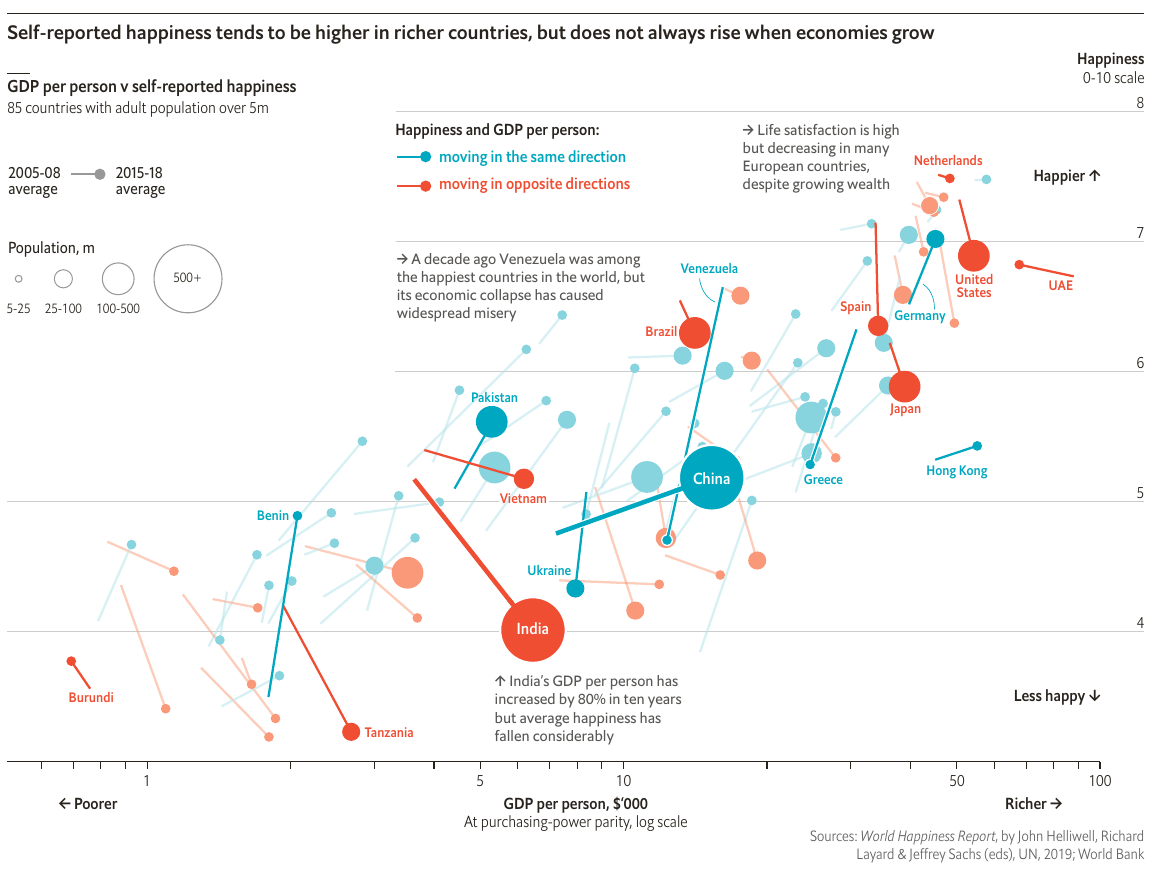

In [17]:
Image("./images/02-happiness-economics.png")

## Desarrollo

In [18]:
# Procesamiento data figura 1
df_fig1 = pd.read_csv('./data/01-behavioural-finance.csv')

paises_fig1 = ['Gre', 'Por', 'Spa', 'Ita', 'Fra', 'Aus', 'Bel', 'Ger', 'NL', 'Ire', 'UK', 'Den', 'Swe', 'Nor', 'Fin']
map_paises_fig1={
    'Gre': 'Greece',
    'Por': 'Portugal',
    'Spa': 'Spain',
    'Ita': 'Italy',
    'Fra': 'France',
    'Aus': 'Austria',
    'Bel': 'Belgium',
    'Ger': 'Germany',
    'NL' : 'Netherlands',
    'Ire': 'Ireland',
    'UK' : 'Britain',
    'Den': 'Denmark',
    'Swe': 'Sweden',
    'Nor': 'Norway',
    'Fin': 'Finland'
}

df_fig1 = df_fig1[['Origin of trust'] + paises_fig1]
df_fig1['Origin of trust'] = pd.Categorical(df_fig1['Origin of trust'], categories=paises_fig1, ordered=True)
df_fig1 = df_fig1.sort_values('Origin of trust').drop(columns='Origin of trust')
df_fig1.columns = df_fig1.columns.map(map_paises_fig1)
df_fig1.index = df_fig1.columns
df_fig1 = (df_fig1*100)

In [19]:
# Procesamiento data figura 2
df_fig2 = pd.read_csv('./data/02-happiness-economics.csv')
df_fig2 = df_fig2[df_fig2.columns[1:]]
#Filtra paises que tengan + de 5M hab en el 2018
paises_5m = df_fig2[(df_fig2['year']==2018)&(df_fig2['pop']>5000000)]['name'].unique()
df_fig2 = df_fig2[df_fig2['name'].isin(paises_5m)]
df_fig2['gdp.pc'] = df_fig2['gdp.pc']/1000
df_2 = df_fig2.copy()

pop_break_map = {'<25m': '5-25', '25m-100m': '25-100', '100m-500m': '100-500', '500m+': '500+'}
df_fig2['pop.break'] = df_fig2['pop.break'].map(pop_break_map)
# Hace pivot entre paises y year
df_fig2 = df_fig2.pivot(index='name', columns='year', values=['happy', 'gdp.pc', 'paradox', 'pop.break', 'pop.levels', 'quadrant']).reset_index()
df_fig2.columns = [col[0] if col[1]=='' else col[0] + '_' + str(col[1])  for col in df_fig2.columns]
df_fig2['pop.levels_sq'] = df_fig2['pop.levels_2018'] ** 2
df_fig2['name'] = df_fig2['name'].apply(lambda x: "UAE" if x=='United Arab Emirates' else x)

In [32]:
# Parametros:
# ---------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------
# Ruta al archivo de fuente
font_path_noto2 = 'Noto_Sans_Symbols_2/NotoSansSymbols2-Regular.ttf' 
font_path_latoBlack = 'Lato/Lato-Black.ttf' 
font_path_latoB = 'Lato/Lato-Bold.ttf' 
font_path_latoR = 'Lato/Lato-Regular.ttf'
font_path_latoI = 'Lato/Lato-Italic.ttf' 
font_path_arialN = 'Arial Narrow/ARIALN.TTF' 
font_path_arialNB = 'Arial Narrow/ARIALNB.TTF' 
font_path_robotoC = 'Roboto/Roboto-Condensed.ttf' 
font_path_robotoCB = 'Roboto/Roboto-BoldCondensed.ttf' 
font_path_nunito7CR = 'Nunito_Sans/NunitoSans_7pt_Condensed-Regular.ttf' 
font_path_nunito7CI = 'Nunito_Sans/NunitoSans_7pt_Condensed-Italic.ttf' 

# Cargar la fuente desde el archivo
prop_noto2 = fm.FontProperties(fname=font_path_noto2)
prop_latoBlack = fm.FontProperties(fname=font_path_latoBlack)
prop_latoB = fm.FontProperties(fname=font_path_latoB)
prop_latoR = fm.FontProperties(fname=font_path_latoR)
prop_latoI = fm.FontProperties(fname=font_path_latoI)
prop_arialN = fm.FontProperties(fname=font_path_arialN)
prop_arialNB = fm.FontProperties(fname=font_path_arialNB)
prop_robotoC = fm.FontProperties(fname=font_path_robotoC)
prop_robotoCB = fm.FontProperties(fname=font_path_robotoCB)
prop_nunito7CR = fm.FontProperties(fname=font_path_nunito7CR)
prop_nunito7CI = fm.FontProperties(fname=font_path_nunito7CI)

# Colores:
# --------
# Colores comunes
gris_claro2_texto = '#777777'
gris_claro_texto = '#555555'
gris_oscuro_texto = '#333333'
gris_oscuro_lineas = '#333333'

# Colores Fig 1
red_20_ = "#E72E2E"
blank_0 = "#E3E9EB"
blue_20 = "#57C6D1"
blue_40 = "#326FA8"
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:E72E2E-28.4:E8B4A4-33.4:E3E9EB-38.4:BBE0E3-67:57C6D1-100:326FA8
    (0.000, (0.906, 0.180, 0.180)),
    (0.284, (0.910, 0.706, 0.643)),
    (0.34, (0.890, 0.914, 0.922)),
    (0.384, (0.733, 0.878, 0.890)),
    (0.670, (0.341, 0.776, 0.820)),
    (1.000, (0.196, 0.435, 0.659))))

gris_null = "#B5B4A6"
my_gradient.set_bad(gris_null)

# Colores Fig 2
palette_fig2 = ['#00a7c0', '#f04e33']
palette_fig2_2 = ['#87d4df', '#f9997a']

#Funciones:
# ---------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------
# Figura 1:
# --------
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df_fig1.shape[0], 0, df_fig1.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

def draw_rombo(pos_x0, pos_y0, r_alfa, facecolor):
    r_d1 = 0.015*r_alfa
    r_d2 = 0.01*r_alfa
    rombo = patches.Polygon([[pos_x0, pos_y0], [pos_x0+r_d1*0.5, pos_y0+r_d2], [pos_x0+r_d1, pos_y0], [pos_x0+r_d1*0.5, pos_y0-r_d2]],facecolor=facecolor)
    return rombo

def cbar_adjust_fig1(fig, hm, pos=[0.6, 0.85, 0.3, 0.13]):
    cbar_ax = fig.add_axes(pos)
    cbar = fig.colorbar(hm.collections[0], ax=cbar_ax, orientation='horizontal', pad=-0.2, aspect=9)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    cbar.set_ticks([-20, 0, 20, 40])
    cbar.set_ticklabels([-20, 0, 20, 40], fontproperties=prop_latoR, fontsize=10, color=gris_claro_texto)
    cbar.ax.tick_params(colors=gris_oscuro_lineas) 
    cbar.outline.set_visible(False)
    cbar.ax.vlines(x=0.0, ymin=0, ymax=1, colors=gris_oscuro_lineas, linewidth=0.8)
    cbar_ax.set_axis_off()
    cbar_ax.text(0.225, 0.11, "Trust bias,           ", ha='right', va='center', color=gris_oscuro_texto,
                 fontsize=11, weight=900, fontproperties=prop_latoB)
    cbar_ax.text(0.255, 0.11, "% pts ", ha='right', va='center', color=gris_claro_texto,
                 fontsize=11, weight=900, fontproperties=prop_latoR)
    cbar_ax.text(0.265, -0.05, "Less trust", ha='left', va='center', color=red_20_,
                 fontsize=9, weight=700, fontproperties=prop_latoB)
    cbar_ax.text(0.735, -0.05, "More trust", ha='right', va='center', color=blue_40,
                 fontsize=9, weight=700, fontproperties=prop_latoB)
    
def heatmap_fig1(df, ax):
    mask = df.isna()
    hm = sns.heatmap(df, mask=mask, cmap=my_gradient, linewidths=0.5, linecolor='white', cbar=False,
                vmin=-22, vmax=42, alpha=1, ax=ax, annot=False)

    # Asigna xticks labels 
    for t in ax.get_xticklabels():
        ax.text(t.get_position()[0]-0.1, t.get_position()[1] + 0.1, t.get_text(), 
                rotation=-45, ha='left', va='top', fontsize=10, weight='light', 
                color=gris_claro_texto, fontproperties=prop_latoR)
        
    for t in ax.get_yticklabels():
        ax.text(t.get_position()[0]+0.1, t.get_position()[1]-0.05, t.get_text(), 
                rotation=45, ha='right', va='top', fontsize=10, weight='light', 
                color=gris_claro_texto, fontproperties=prop_latoR)
    return hm

def rectangles_heatmap_fig1(ax, pos_list):
    for pos in pos_list:
        rect_ = patches.Rectangle((pos[0], pos[1]), pos[2], pos[3], linewidth=1, edgecolor=gris_oscuro_lineas, facecolor='none')
        ax.add_patch(rect_)

def text_bottom_heatmap_fig1(ax):
    ax.text(3, -3, "...trust people from \nthese countries*", ha='left', va='center',
         fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB, linespacing=1.4)

    ax.text(4, -3, "🡴", ha='right', va='bottom',
            fontsize=12, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)

    ax.text(-3.5, 3.5, "How much people from\n    these countries...", ha='right', va='center',
            fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB, linespacing=1.4)

    ax.text(-3, 4, "🡵", ha='right', va='bottom',
            fontsize=12, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    
def annotate_top_heatmap_fig1(ax, pos_izq, pos_der, pos_annotate_izq, pos_annotate_der, ls=[1,1], fontsize=10):
    # Izquierda
    ax.text(pos_izq[0], pos_izq[1], 
            "Britain tends to \ndisproportionately\n            Ireland. The Irish\ndo not reciprocate",
            ha='left', va='top', fontsize=fontsize, weight=900, color=gris_claro_texto, fontproperties=prop_latoR, linespacing=ls[0])
    ax.text(pos_izq[0], pos_izq[1],
            "                 \n                  \ntrust",
            ha='left', va='top', fontsize=fontsize, weight=900, color=blue_40, fontproperties=prop_latoB, linespacing=ls[0])
    ax.annotate('', xy=pos_annotate_izq[0], xytext=pos_annotate_izq[1],
                 arrowprops=dict(arrowstyle="-", connectionstyle="angle,angleA=90,angleB=0,rad=0", color=gris_oscuro_lineas), linespacing=ls[0])
    # Derecha
    ax.text(pos_der[0], pos_der[1], 
            "Northern Europeans \ndisproportionately         \nsouthern Europeans. The same\nis true the other way around",
            ha='left', va='top', fontsize=fontsize, weight=900, color=gris_claro_texto, fontproperties=prop_latoR, linespacing=ls[1])
    ax.text(pos_der[0], pos_der[1], 
            "\n                                            distrust",
            ha='left', va='top', fontsize=fontsize, weight=900, color=red_20_, fontproperties=prop_latoB, linespacing=ls[1])
    ax.annotate('', xy=pos_annotate_der[0], xytext=pos_annotate_der[1],     
        arrowprops=dict(arrowstyle="-", connectionstyle="angle,angleA=90,rad=0", color=gris_oscuro_lineas), linespacing=ls[1])
    
def subtitle_fig1(fig, ax, pos_line_sub, lw_line_sub, posx_text_sub, posy_text_sub, pos_x0, pos_y0, r_alfa):
    fig.add_artist(
        lines.Line2D([pos_line_sub[0], pos_line_sub[0] + 0.03], [pos_line_sub[1], pos_line_sub[1]], lw=lw_line_sub, color=gris_oscuro_lineas,
                     solid_capstyle="butt", transform=ax.transAxes))
    fig.text(posx_text_sub, posy_text_sub, "Trust biases* between European nations",
            ha='left', va='top', fontsize=11, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoBlack)

    rombo = draw_rombo(pos_x0, pos_y0, r_alfa, gris_null)
    ax.add_patch(rombo)
    ax.text(pos_x0+0.022, pos_y0, "No data", ha='left', va='center', fontsize=11, weight=900, 
            color=gris_claro_texto, fontproperties=prop_latoR)

def title_fig1(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, color=gris_oscuro_lineas,
                    solid_capstyle="butt", transform=ax.transAxes))
    fig.text(pos_x0_title, pos_y0_title, "Equity analysts are less likely to recommend stocks from countries their nation is biased against",
            ha='left', va='top', fontsize=13.1, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoBlack)
    
def draw_fig1(fig, ax):
    # Rota ejes
    ax0 = rotate_axes(fig, 111,45)
    # Crea Heatmap
    hm = heatmap_fig1(df_fig1, ax0)
    # Crea color bar
    cbar_adjust_fig1(fig, hm, pos=[0.6-0.01, 0.85, 0.3, 0.13])
    # Crea recuadros
    pos_list = [[11, 0, 4, 4], [0, 11, 4, 4], [9, 10, 1, 1], [10, 9, 1, 1]]
    rectangles_heatmap_fig1(ax0, pos_list)
    # Crea textos parte baja
    text_bottom_heatmap_fig1(ax0)
    # Anotaciones parte superior izquierda
    pos_izq = [17.8, 9.2]
    pos_der = [5.3, 21.7]
    pos_annotate_izq = [(10.95, 9.05), (17.5, 6.2)]
    pos_annotate_der = [(6.4, 17.4), (3.95, 14.95)]
    annotate_top_heatmap_fig1(ax0, pos_izq, pos_der, pos_annotate_izq, pos_annotate_der, ls=[1.4,1.4], fontsize=10)
    # Subtitulo
    pos_line_sub = [0.045, 1.035]
    lw_line_sub = 1.5
    posx_text_sub = 0.16
    posy_text_sub = 0.9
    pos_x0_sub = 0.045
    pos_y0_sub = 0.98
    r_alfa = 1.2
    subtitle_fig1(fig, ax, pos_line_sub, lw_line_sub, posx_text_sub, posy_text_sub, pos_x0_sub, pos_y0_sub, r_alfa)
    # Titulo
    posx_line_title = [0.045, 1.091]
    posy_line_title = [1.13, 1.13]
    lw_line_title = 1
    pos_x0_title = 0.16
    pos_y0_title = 0.97
    title_fig1(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title)

# Figura 2:
# --------
def scatter_line(df, ax, col_x_ini, col_x_end, col_y_ini, col_y_end, color, size_map, range_size, alpha_scatter, alpha_line, paleta, zorder, border_fig):
    df_ = df.copy()
    df_['pop.levels_2018'] = df_['pop.levels_2018'].apply(lambda x: size_map[x])

    for i_df in range(df_.shape[0]):
        line_w = [3.0 if df_['pop.break_2018'].iloc[i_df]=='500+' else 1.5][0]
        if border_fig:
            ax.plot([df_[col_x_ini].iloc[i_df], df_[col_x_end].iloc[i_df]], 
                    [df_[col_y_ini].iloc[i_df], df_[col_y_end].iloc[i_df]],
                    color=paleta[df_[color].iloc[i_df]],
                    alpha=alpha_line, linewidth=line_w, zorder=zorder, 
                    path_effects=[pe.Stroke(linewidth=line_w+2, foreground='white'), pe.Normal()])
        else:
            ax.plot([df_[col_x_ini].iloc[i_df], df_[col_x_end].iloc[i_df]], 
                    [df_[col_y_ini].iloc[i_df], df_[col_y_end].iloc[i_df]],
                    color=paleta[df_[color].iloc[i_df]],
                    alpha=alpha_line, linewidth=line_w, zorder=zorder)
        
    sns.scatterplot(data=df_, x=col_x_end, y=col_y_end, hue=color, size='pop.levels_2018', sizes=range_size, alpha=alpha_scatter,
                    legend=False, palette=paleta, edgecolor=['white' if border_fig else None][0], linewidth=1, ax=ax, zorder=zorder)
    if border_fig:
        for i_df in range(df_.shape[0]):
            line_w = [3.0 if df_['pop.break_2018'].iloc[i_df]=='500+' else 1.5][0]
            ax.plot([df_[col_x_ini].iloc[i_df], df_[col_x_end].iloc[i_df]], 
                    [df_[col_y_ini].iloc[i_df], df_[col_y_end].iloc[i_df]],
                    color=paleta[df_[color].iloc[i_df]],
                    alpha=alpha_line, linewidth=line_w, zorder=zorder)


def draw_scatter_fig2(ax, df_paises_1, df_paises_2, size_map_, paises_borde_blanco, paises_fig2, diff_pos_fig2):
    scatter_line(df_paises_2, ax, 'gdp.pc_2008', 'gdp.pc_2018', 'happy_2008', 'happy_2018',
                'paradox_2018', size_map_, (size_map_[1], size_map_[3]), 0.85, 0.3, palette_fig2_2, 1, False)

    sns.scatterplot(data=df_paises_2[df_paises_2['name']=='Canada'], x='gdp.pc_2018', y='happy_2018', hue='paradox_2018', size='pop.levels_2018', sizes=(size_map_[2],size_map_[2]), alpha=1,
                        legend=False, palette=[palette_fig2_2[1]], edgecolor='white', linewidth=1, ax=ax, zorder=2)

    scatter_line(df_paises_1[~df_paises_1['name'].isin(paises_borde_blanco)], ax, 'gdp.pc_2008', 'gdp.pc_2018', 'happy_2008', 'happy_2018',
                'paradox_2018', size_map_, (size_map_[1], size_map_[3]), 1, 1, palette_fig2, 2, False)

    scatter_line(df_paises_1[(df_paises_1['name'].isin(paises_borde_blanco)) & (~df_paises_1['name'].isin(['China', 'India']))],
                ax, 'gdp.pc_2008', 'gdp.pc_2018', 'happy_2008', 'happy_2018',
                'paradox_2018', size_map_, (size_map_[1], size_map_[3]), 1, 1, [palette_fig2[0]], 2, True)

    scatter_line(df_paises_1[(df_paises_1['name'].isin(paises_borde_blanco)) & (df_paises_1['name'].isin(['China', 'India']))],
                ax, 'gdp.pc_2008', 'gdp.pc_2018', 'happy_2008', 'happy_2018',
                'paradox_2018', size_map_, (size_map_[4], size_map_[4]), 1, 1, palette_fig2, 2, True)

    # textos scatter
    for _, df_w in df_paises_1[df_paises_1['name'].isin(['China', 'India'])].iterrows():
        ax.text(df_w['gdp.pc_2018'], df_w['happy_2018'], df_w['name'], 
            fontproperties=prop_latoB,
            ha="center", va="center", fontsize=9, fontweight=300, color='white')
        
    paises_fig2_ = paises_fig2[:5] + paises_fig2[6:9] + paises_fig2[10:]
    i=0
    for _, df_w in df_paises_1[df_paises_1['name'].isin(paises_fig2_)].iterrows():
        diff_i = diff_pos_fig2[df_w['name']]
        diff_name = df_w['name']
        if diff_name=='United States':
            diff_name = 'United\nStates'
        ax.text(df_w['gdp.pc_2018']*diff_i[0], df_w['happy_2018']+diff_i[1], diff_name, 
            fontproperties=prop_latoB,
            ha="center", va="center", fontsize=8, fontweight=300, color=palette_fig2[df_w['paradox_2018']])
        
        if df_w['name']=='Venezuela':
            ax.annotate('', xy=(df_w['gdp.pc_2018']*1.32, df_w['happy_2018']+1.72), xytext=(df_w['gdp.pc_2018']*1.25, df_w['happy_2018']+1.97), 
                        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=.28', color=palette_fig2[df_w['paradox_2018']], lw=0.4))

        if df_w['name']=='Germany':
            ax.annotate('', xy=(df_w['gdp.pc_2018']*0.92, df_w['happy_2018']-0.37), xytext=(df_w['gdp.pc_2018']*0.97, df_w['happy_2018']+-0.57), 
                        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=.28', color=palette_fig2[df_w['paradox_2018']], lw=0.4))      
        i+=1

def mod_grid_fig2(ax):
    ax.set_xticks([1, 5, 10, 50, 100])
    ax.set_xticklabels([1, 5, 10, 50, 100], fontproperties=prop_robotoC, fontsize=10, color=gris_claro2_texto)
    ax.set_yticks([4, 5, 6, 7, 8])
    ax.set_yticklabels([4, 5, 6, 7, 8])
    ax.yaxis.set_tick_params(labelleft=False, length=0)
    ax.grid(axis = "y", color=gris_oscuro_lineas, lw=0.15)
    ax.set_axisbelow(True)

    ax.set_ylim(2.95, 8)
    ax.set_xlim(0.51, 130)

    PAD_y = 0.01
    PAD_x = 120
    for label in [4, 5, 6, 7, 8]:
        ax.text(
            PAD_x, label + PAD_y, label, 
            fontproperties=prop_robotoC,
            ha="left", va="bottom", fontsize=10, fontweight=300, color=gris_claro2_texto
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)

    ax.set_xlabel('')
    ax.set_ylabel('')

def rect_izq_fig2(fig, ax, pos_axes, axes_view=False):
    pos_x0 = 0.01
    pos_y0 = 0.88
    posx_line = [pos_x0+0.003, 0.06]
    posy_line = [pos_y0+0.01, pos_y0+0.01]
    lw_line = 0.5
    ax_aux = fig.add_axes(pos_axes)
    #Titulo
    ax_aux.add_artist(
            lines.Line2D(posx_line, posy_line, lw=lw_line, color=gris_oscuro_lineas,
                        solid_capstyle="butt", transform=ax_aux.transAxes))
    ax_aux.text(pos_x0, pos_y0, "GDP per person v self-reported happiness",
            ha='left', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    ax_aux.text(pos_x0, pos_y0-0.06, "85 countries with adult population over 5m",
            ha='left', va='top', fontsize=9, weight=900, color=gris_claro_texto, fontproperties=prop_latoR)
    # Leyenda 1
    ax_aux.text(pos_x0, pos_y0-0.2, "2005-08\naverage",
            ha='left', va='top', fontsize=9, weight=900, color=gris_claro_texto, fontproperties=prop_latoB)
    ax_aux.text(pos_x0+0.26, pos_y0-0.2, "2015-18\naverage",
            ha='left', va='top', fontsize=9, weight=900, color=gris_claro_texto, fontproperties=prop_latoB)
    ax_aux.annotate('', xy=(pos_x0+0.245, pos_y0-0.22), xytext=(pos_x0+0.15, pos_y0-0.22),     
        arrowprops=dict(arrowstyle="-", color=gris_claro2_texto))
    circle_1 = patches.Circle((pos_x0+0.23, pos_y0-0.22), 0.008, color=gris_claro2_texto, fill=True, lw=2)
    ax_aux.add_patch(circle_1)
    # Leyenda 2
    pos_x0, pos_y0 = pos_x0, pos_y0-0.375
    ax_aux.text(pos_x0, pos_y0, "Population, m",
            ha='left', va='top', fontsize=9, weight=900, color=gris_claro_texto, fontproperties=prop_latoR)
    r_i = [0.01, 0.02, 0.04, 0.08]
    pos_c_i = [0.03, 0.132, 0.27, 0.43]
    text_c_i = ['5-25', '25-100', '100-500', '']
    for i in range(4):
        circle_2 = patches.Circle((pos_x0+pos_c_i[i], pos_y0-0.1), r_i[i], color=gris_claro_texto, fill=False, lw=0.5)
        ax_aux.add_patch(circle_2)
        ax_aux.text(pos_x0+pos_c_i[i], pos_y0-0.15, text_c_i[i],
                    ha='center', va='top', fontsize=7, weight=900, color=gris_claro_texto, fontproperties=prop_latoR)
    ax_aux.text(pos_x0+pos_c_i[3], pos_y0-0.085, '500+',
                    ha='center', va='top', fontsize=7, weight=900, color=gris_claro_texto, fontproperties=prop_latoR)
    
    if axes_view: 
        ax_aux.spines["right"].set_visible(False)
        ax_aux.spines["top"].set_visible(False)
        ax_aux.spines["left"].set_visible(False)
        ax_aux.spines["bottom"].set_visible(False)
        ax_aux.set_xticks([])
        ax_aux.set_yticks([])

def title_fig2(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, color=gris_oscuro_lineas,
                    solid_capstyle="butt", transform=ax.transAxes))
    fig.text(pos_x0_title, pos_y0_title, "Self-reported happiness tends to be higher in richer countries, but does not always rise when economies grow",
            ha='left', va='top', fontsize=12, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    

def text_axis_fig2(fig):
    # Textos eje x
    fig.text(0.17, 0.07, "Poorer", ha='left', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.158, 0.0625, "🡰", ha='left', va='center', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    fig.text(0.828, 0.07, "Richer", ha='right', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.838, 0.0625, "🡲", ha='right', va='center', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    fig.text(0.51, 0.07, "GDP per person, $'000", ha='center', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.51, 0.049, "At purchasing-power parity, log scale", ha='center', va='top', fontsize=10, weight=900, color=gris_claro_texto, fontproperties=prop_latoR)

    # Textos eje y
    fig.text(0.828+0.03, 0.07+0.125, "Less happy", ha='right', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.838+0.03, 0.0625+0.125, "🡳", ha='right', va='center', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    fig.text(0.828+0.03, 0.07+0.125+0.62, "Happier", ha='right', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.838+0.03, 0.0625+0.125+0.62, "🡱", ha='right', va='center', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_noto2)
    fig.text(0.828+0.068, 0.07+0.125+0.75, "Happiness", ha='right', va='top', fontsize=10, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    fig.text(0.828+0.068, 0.07+0.125+0.73, "0-10 scale", ha='right', va='top', fontsize=10, weight=900, color=gris_claro_texto, fontproperties=prop_robotoC)

def annotate1_fig2(fig, pos_axes, axes_view=False):
    pos_x0 = 0.01
    pos_y0 = 0.99
    ax_aux = fig.add_axes(pos_axes)

    ax_aux.text(pos_x0, pos_y0-0.03, "Happiness and GDP per person:",
            ha='left', va='top', fontsize=9, weight=900, color=gris_oscuro_texto, fontproperties=prop_latoB)
    
    pos_x0, pos_y0 = pos_x0, pos_y0-0.04
    ax_aux.text(pos_x0+0.145, pos_y0-0.1, "moving in the same direction",
            ha='left', va='center', fontsize=9, weight=900, color=palette_fig2[0], fontproperties=prop_latoB)
    ax_aux.annotate('', xy=(pos_x0, pos_y0-0.1), xytext=(pos_x0+0.09, pos_y0-0.1),     
        arrowprops=dict(arrowstyle="-", color=palette_fig2[0]))
    circle_1 = patches.Circle((pos_x0+0.09, pos_y0-0.1), 0.015, color=palette_fig2[0], fill=True, lw=1)
    ax_aux.add_patch(circle_1)

    pos_x0, pos_y0 = pos_x0, pos_y0-0.09
    ax_aux.text(pos_x0+0.145, pos_y0-0.1, "moving in opposite directions",
            ha='left', va='center', fontsize=9, weight=900, color=palette_fig2[1], fontproperties=prop_latoB)
    ax_aux.annotate('', xy=(pos_x0, pos_y0-0.1), xytext=(pos_x0+0.09, pos_y0-0.1),     
        arrowprops=dict(arrowstyle="-", color=palette_fig2[1]))
    circle_1 = patches.Circle((pos_x0+0.09, pos_y0-0.1), 0.015, color=palette_fig2[1], fill=True, lw=1)
    ax_aux.add_patch(circle_1)
    
    if axes_view: 
        ax_aux.set_axis_off()

def annotate2_fig2(ax, text, pos_text, arrow, text_arrow, ls=[1, 1]):
    ax.text(pos_text[0], pos_text[1], text, ha='left', va='top', fontsize=10, weight=900, color=gris_claro_texto, fontproperties=prop_latoR, linespacing=ls[0])
    ax.text(text_arrow[0], text_arrow[1], arrow, ha='left', va='top', fontsize=10, weight=500, color=gris_claro_texto, fontproperties=prop_noto2, linespacing=ls[1])

def rect_der_inf_fig2(fig, pos_axes, axes_view=False):
    ax_aux = fig.add_axes(pos_axes) 
    if axes_view: 
        ax_aux.spines["right"].set_visible(False)
        ax_aux.spines["top"].set_visible(False)
        ax_aux.spines["left"].set_visible(False)
        ax_aux.spines["bottom"].set_visible(False)
        ax_aux.set_xticks([])
        ax_aux.set_yticks([])

def text_foot_fig2(fig, pos_x=0.9, pos_y=0.0):
    fig.text(pos_x-0.207, pos_y, "Sources:", ha='right', va='top', fontsize=9, weight=100, color=gris_claro2_texto, fontproperties=prop_nunito7CR)
    fig.text(pos_x-0.105, pos_y, "World Happiness Report,", ha='right', va='top', fontsize=9, weight=100, color=gris_claro2_texto, fontproperties=prop_nunito7CI)
    fig.text(pos_x, pos_y, "by John Helliwell, Richard", ha='right', va='top', fontsize=9, weight=100, color=gris_claro2_texto, fontproperties=prop_nunito7CR)
    fig.text(pos_x, pos_y-0.02, "Layard & Jeffrey Sachs (eds), UN, 2019; World Bank", ha='right', va='top', fontsize=9, weight=100, color=gris_claro2_texto, fontproperties=prop_nunito7CR)

def draw_fig2(fig, ax):
    # scatterplot
    paises_fig2 = ['Burundi', 'Tanzania', 'Benin', 'Pakistan', 'Vietnam', 'India', 'Ukraine', 'Venezuela', 'Brazil',
            'China', 'Greece', 'Spain', 'Japan', 'Germany', 'Netherlands', 'United States', 'Hong Kong', 'UAE']
    df_paises_1 = df_fig2[df_fig2['name'].isin(paises_fig2)].sort_values(['pop.levels_2018', 'happy_2018'], ascending=[False, True])
    df_paises_2 = df_fig2[~df_fig2['name'].isin(paises_fig2)]
    size_map_ = {1:40, 2:120, 3:360, 4:2000}
    paises_borde_blanco = ['India', 'Greece', 'Venezuela', 'China']
    diff_pos_fig2 = {
        'Burundi': [1.1,-0.29],
        'Tanzania': [1.19,0],
        'Benin': [0.895,0],
        'Pakistan': [1,0.2],
        'Vietnam': [1,-0.17],
        'Ukraine': [0.9,0.14],
        'Venezuela': [1.3,2.03],
        'Brazil': [0.855,0],
        'Greece': [1.065,-0.12],
        'Spain': [0.9,0.15],
        'Japan': [1,-0.2],
        'Germany': [0.92,-0.62],
        'Netherlands': [1,0.14],
        'United States': [1,-0.25],
        'Hong Kong': [0.9,-0.2],
        'UAE': [1.25,-0.125]
        }
    draw_scatter_fig2(ax, df_paises_1, df_paises_2, size_map_, paises_borde_blanco, paises_fig2, diff_pos_fig2)
    # Texto ejes
    text_axis_fig2(fig)
    # texto pie pagina
    text_foot_fig2(fig, pos_x=0.9, pos_y=0.03)
    # Anotaciones scatter
    annotate2_fig2(ax, '     A decade ago Venezuela was among\nthe happiest countries in the world, but\nits economic collapse has caused\nwidespread misery', [3.2, 6.95], '🡲', [3.2, 6.965], [1.4, 1.4])
    annotate2_fig2(ax, '     Life satisfaction is high\nbut decreasing in many\nEuropean countries,\ndespite growing wealth', [17.5, 7.92], '🡲', [17.5, 7.935], [1.4, 1.4])
    annotate2_fig2(ax, "     India's GDP per person has\nincreased by 80% in ten years\nbut average happiness has\nfallen considerably", [5.5, 3.62], '🡱', [5.5, 3.635], [1.4, 1.4])
    plt.xscale('log')
    # Recuadro superior izquierdo
    rect_izq_fig2(fig, ax, [0.125, 0.52, 0.255, 0.435], True)
    # Leyenda
    annotate1_fig2(fig, [0.380, 0.58, 0.19, 0.3], axes_view=True)
    # Modificacion grilla
    mod_grid_fig2(ax)
    posx_line_title = [0.003, 0.995]
    posy_line_title = [1.137, 1.137]
    lw_line_title = 0.5
    pos_x0_title = 0.127
    pos_y0_title = 0.98
    title_fig2(fig, ax, posx_line_title, posy_line_title, lw_line_title, pos_x0_title, pos_y0_title)
    rect_der_inf_fig2(fig, [0.8642, 0.105, 0.0363, 0.01], axes_view=True) # borra final eje x

#### Gráfica Problema 1

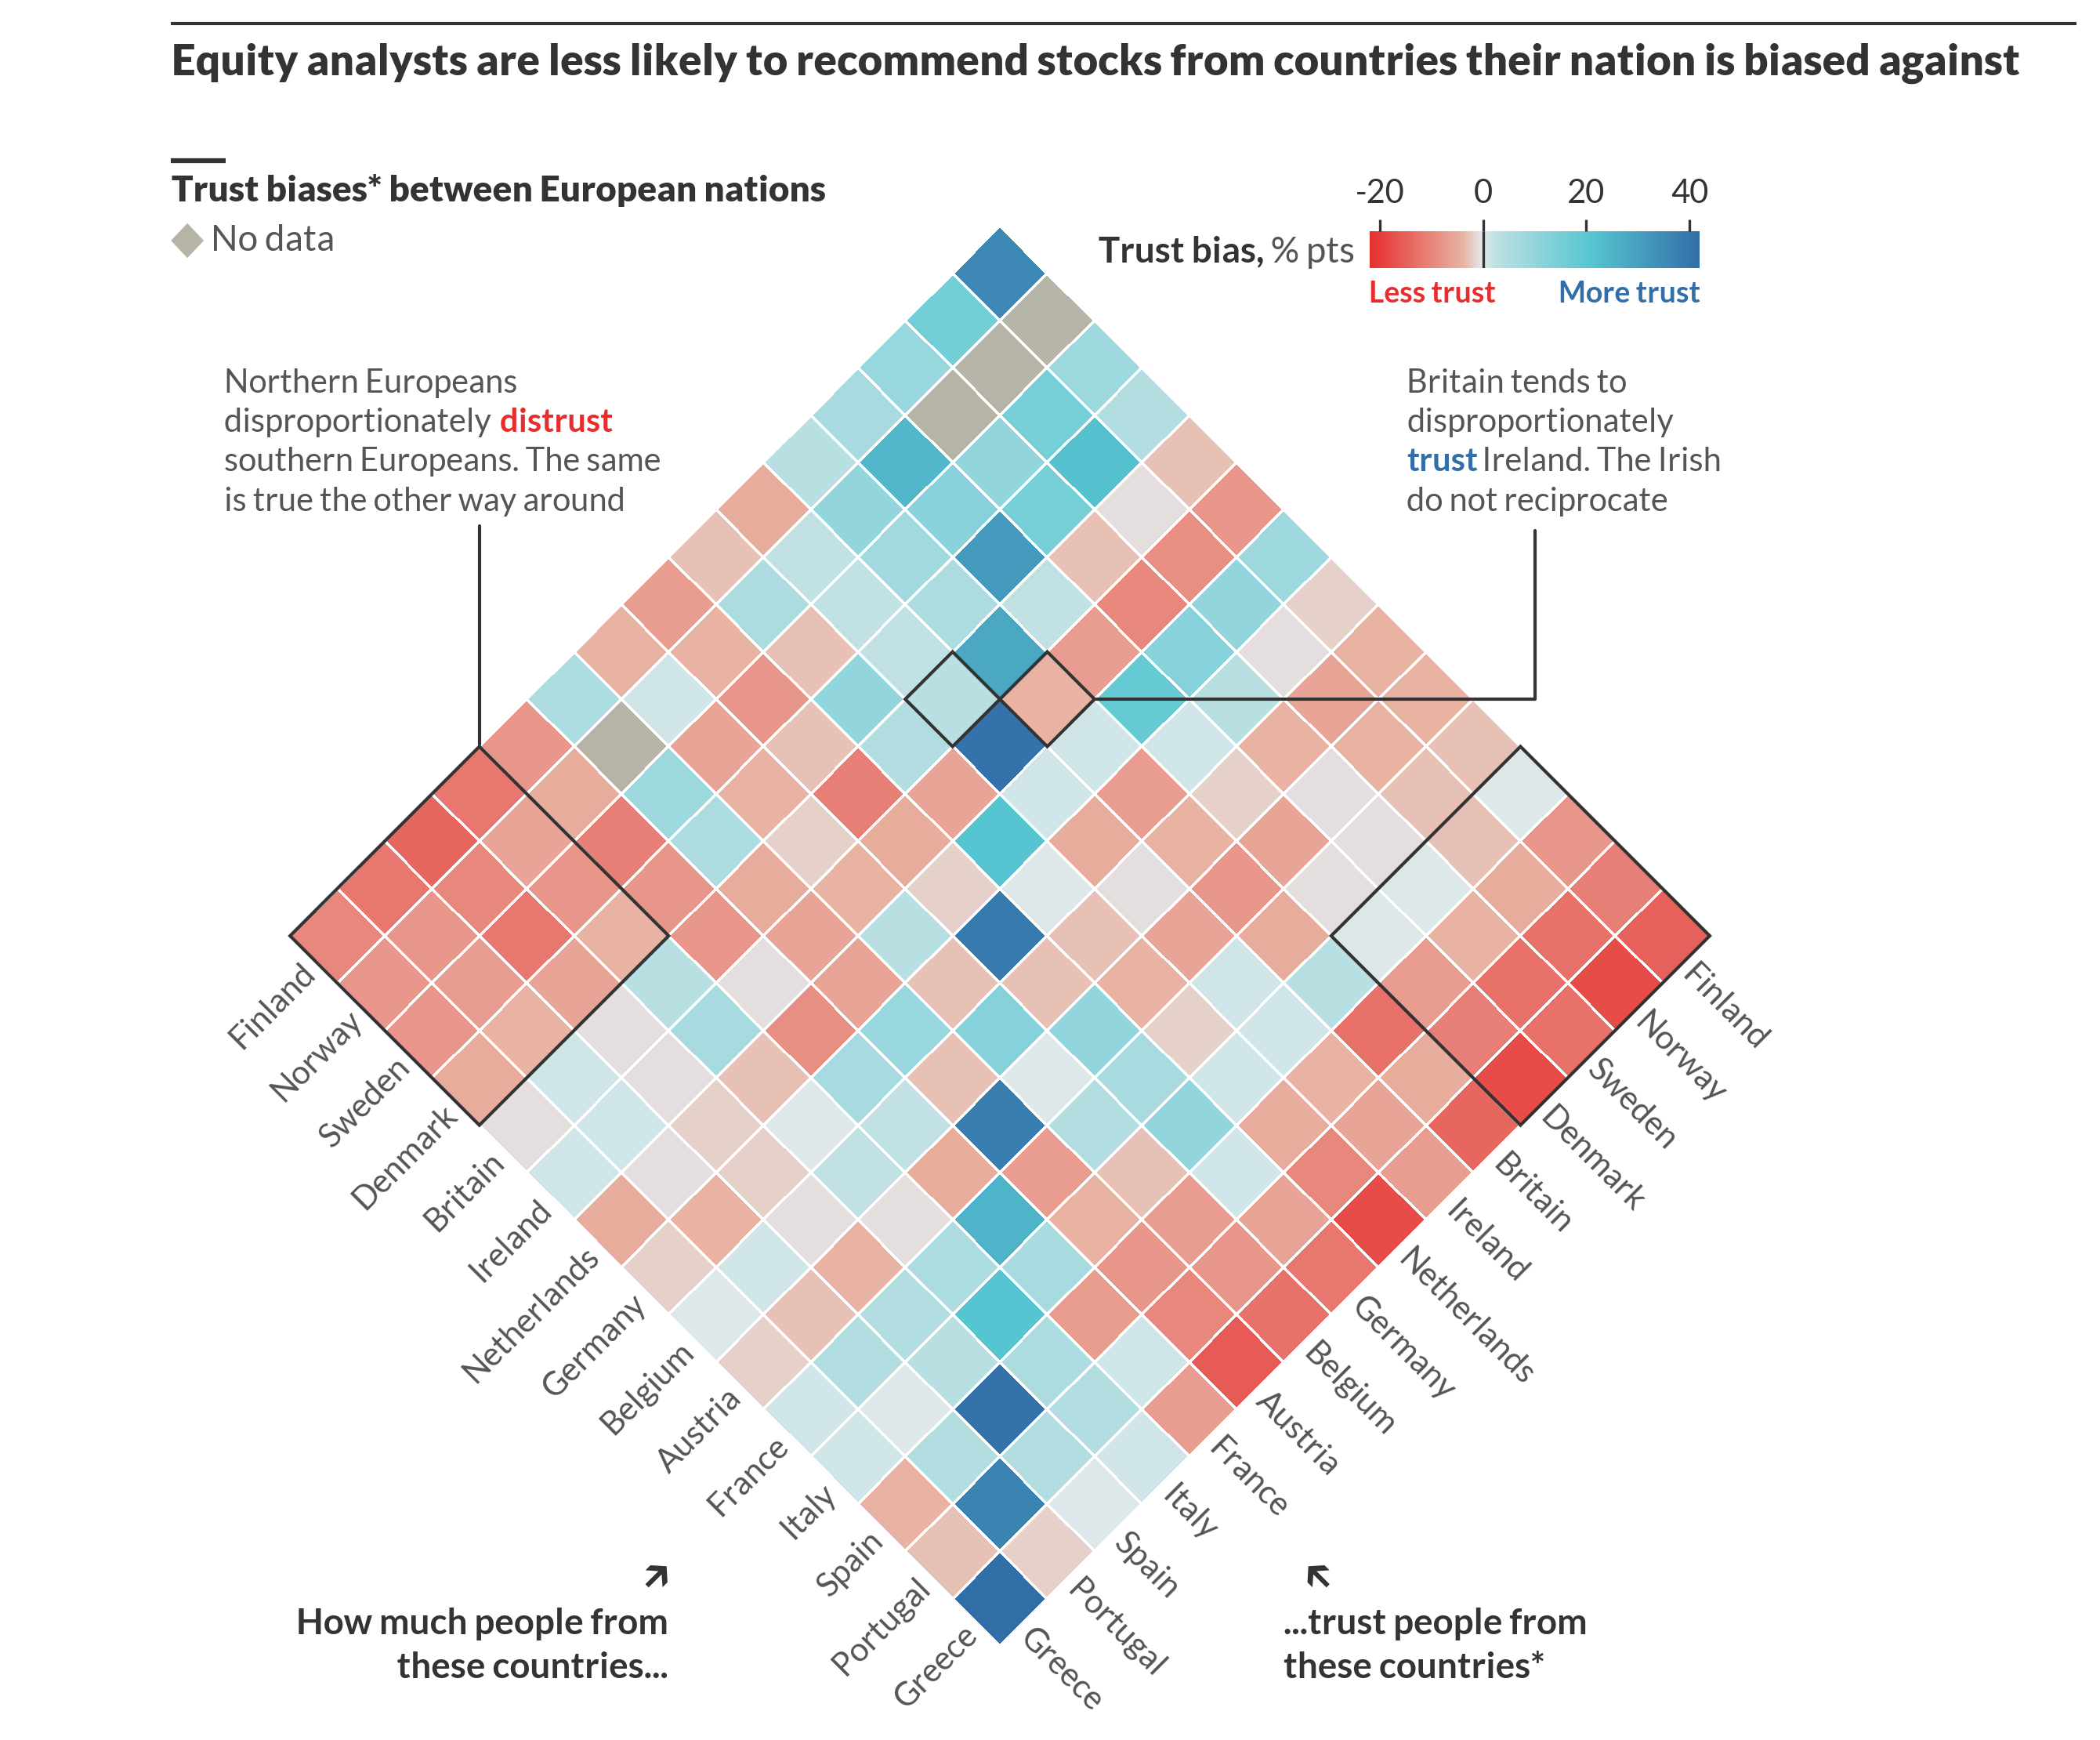

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10, 8), dpi=300)
draw_fig1(fig, ax)
ax.set_axis_off()
plt.show()

#### Gráfica Problema 2

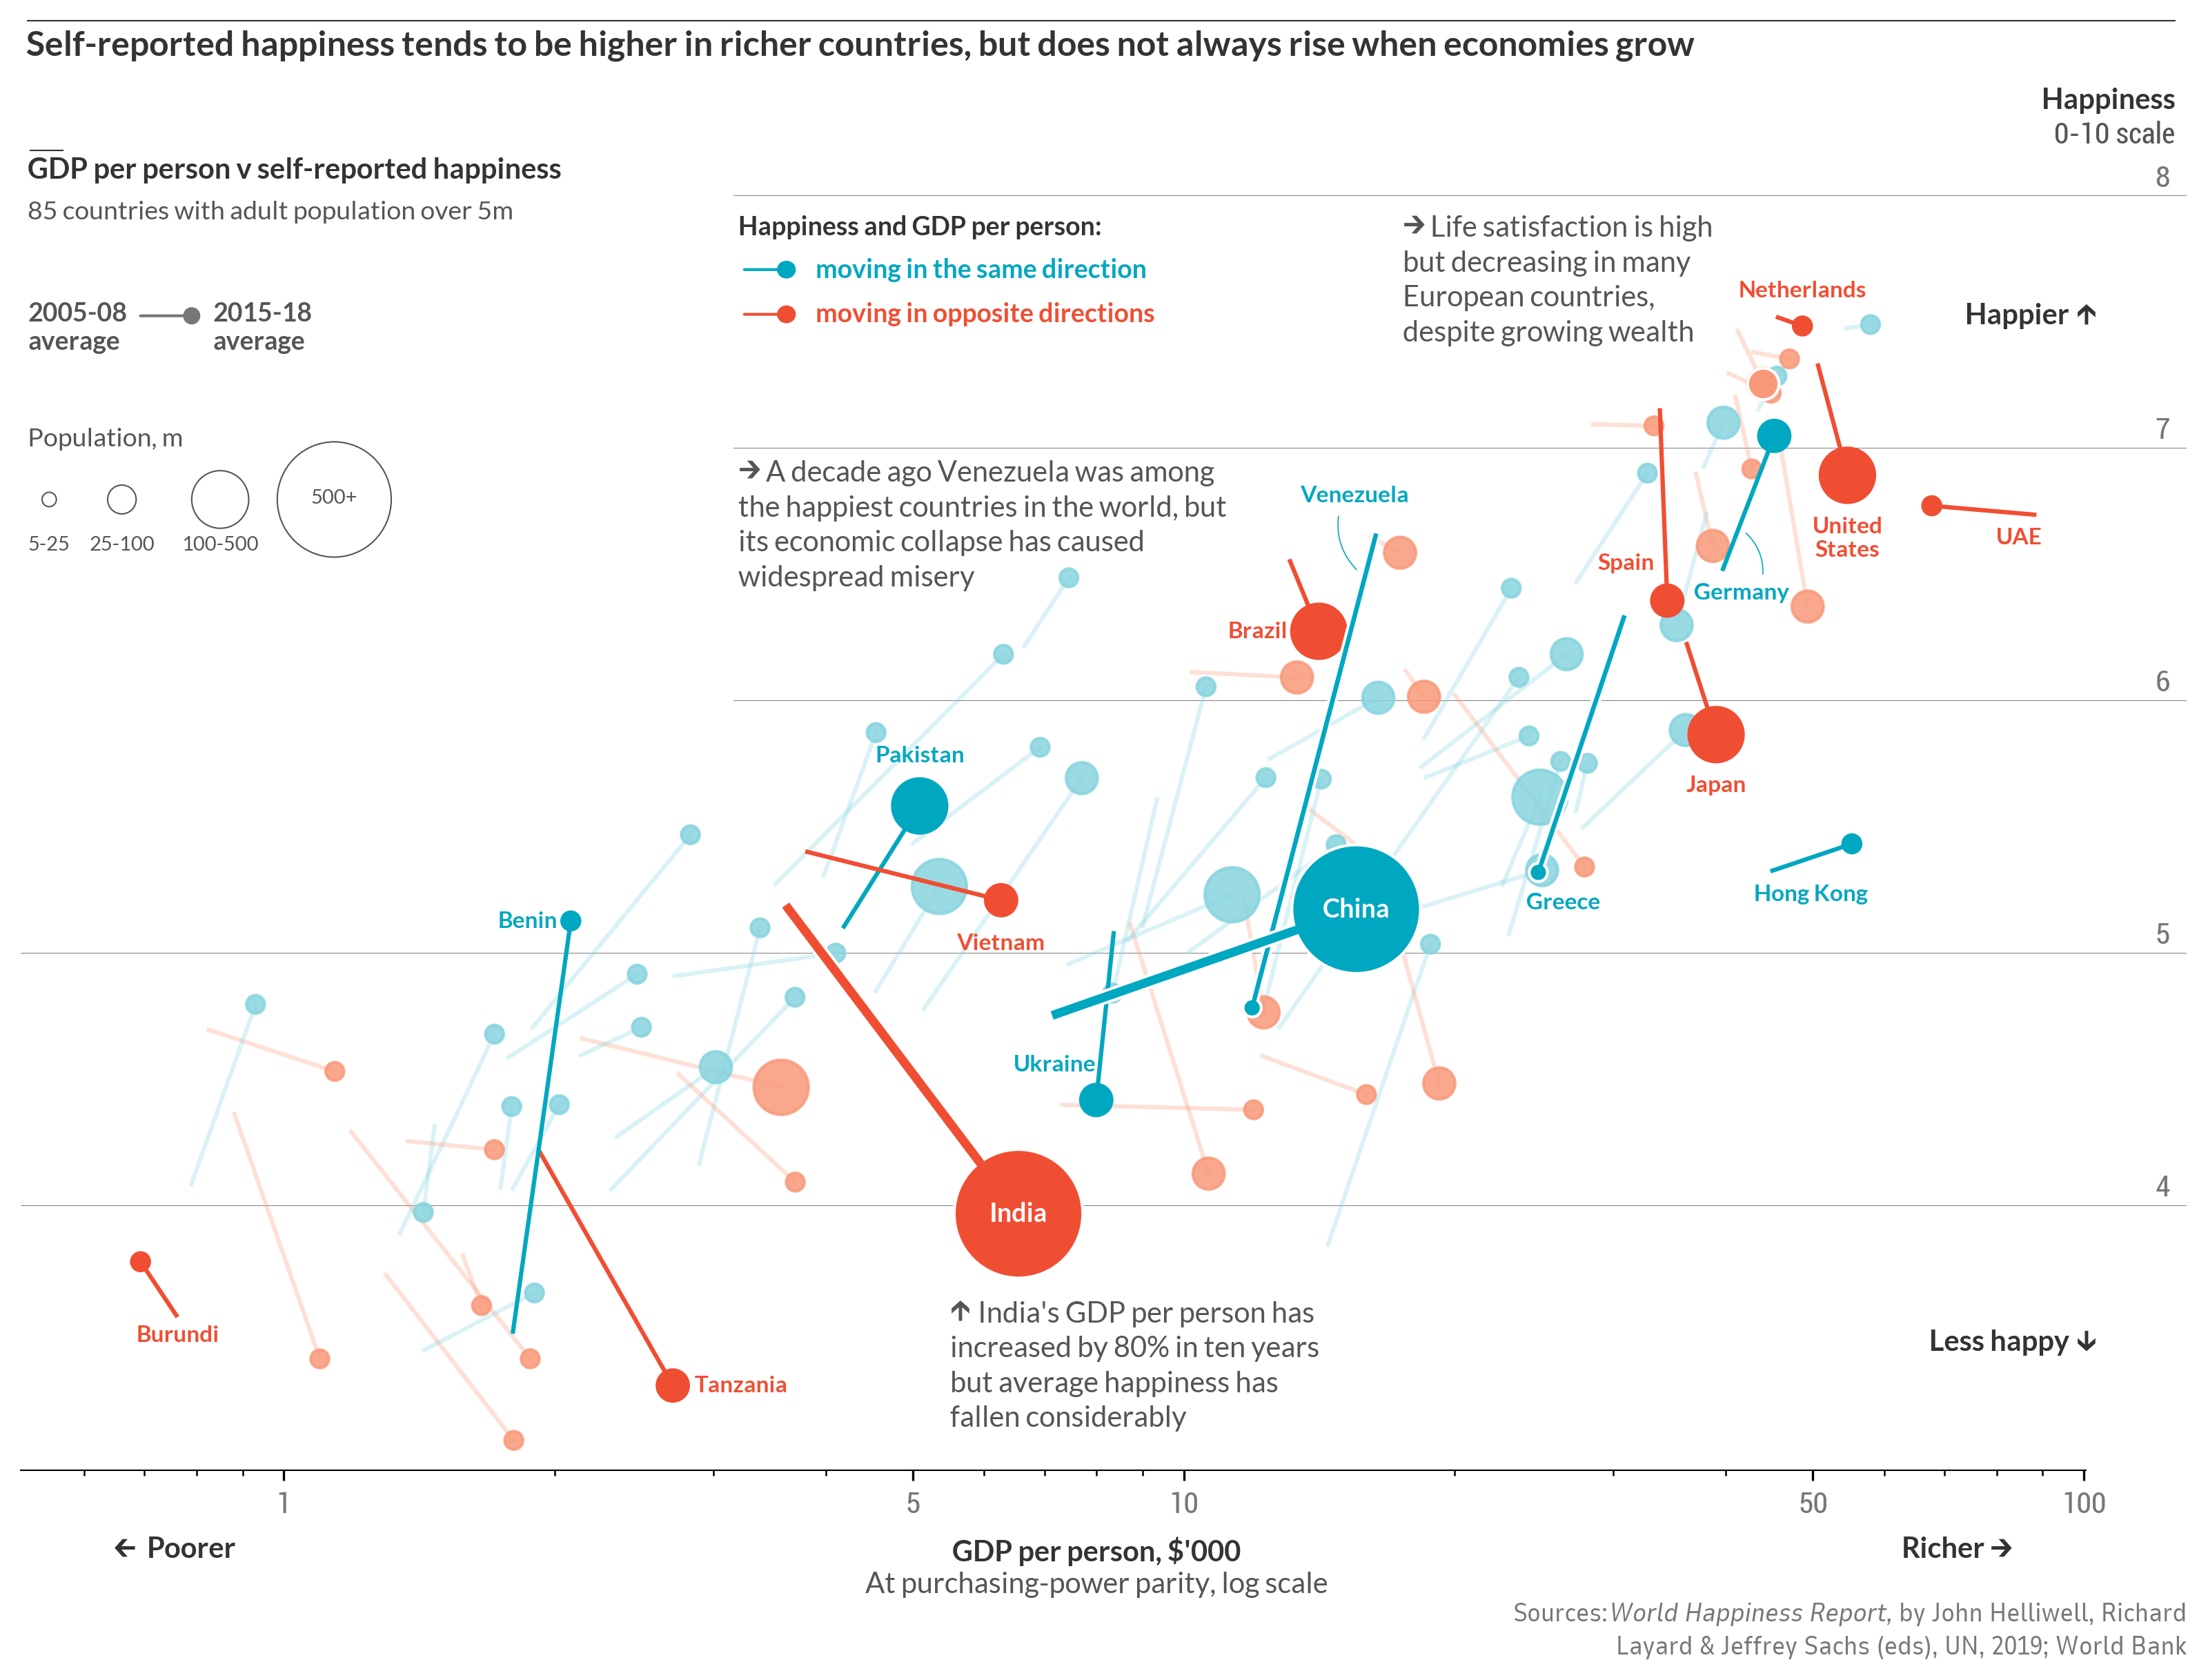

In [34]:
fig, ax = plt.subplots(1,1, figsize=(13.5, 8), dpi=300)
draw_fig2(fig, ax)
plt.show()